In [132]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import string

# NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
# Imporing json files
import json
from google.colab import files
uploaded = files.upload()

Saving ver1_scrapedweb-107.json to ver1_scrapedweb-107 (2).json
Saving ver1_scrapedweb-1023.json to ver1_scrapedweb-1023 (2).json
Saving ver1_scrapedweb-1024.json to ver1_scrapedweb-1024 (2).json
Saving ver1_scrapedweb-1025.json to ver1_scrapedweb-1025 (2).json
Saving ver1_scrapedweb-1026.json to ver1_scrapedweb-1026 (2).json
Saving ver1_scrapedweb-1027.json to ver1_scrapedweb-1027 (2).json
Saving ver1_scrapedweb-1030.json to ver1_scrapedweb-1030 (2).json
Saving ver1_scrapedweb-1031.json to ver1_scrapedweb-1031 (2).json
Saving ver1_scrapedweb-1032.json to ver1_scrapedweb-1032 (2).json
Saving ver1_scrapedweb-1033.json to ver1_scrapedweb-1033 (2).json
Saving ver1_scrapedweb-1034.json to ver1_scrapedweb-1034 (2).json
Saving ver1_scrapedweb-1035.json to ver1_scrapedweb-1035 (2).json
Saving ver1_scrapedweb-1036.json to ver1_scrapedweb-1036 (2).json
Saving ver1_scrapedweb-1037.json to ver1_scrapedweb-1037 (2).json
Saving ver1_scrapedweb-1063.json to ver1_scrapedweb-1063 (2).json
Saving ver1_

In [106]:
json_files = list(uploaded.keys())
json_files

['ver1_scrapedweb-107.json',
 'ver1_scrapedweb-1023.json',
 'ver1_scrapedweb-1024.json',
 'ver1_scrapedweb-1025.json',
 'ver1_scrapedweb-1026.json',
 'ver1_scrapedweb-1027.json',
 'ver1_scrapedweb-1030.json',
 'ver1_scrapedweb-1031.json',
 'ver1_scrapedweb-1032.json',
 'ver1_scrapedweb-1033.json',
 'ver1_scrapedweb-1034.json',
 'ver1_scrapedweb-1035.json',
 'ver1_scrapedweb-1036.json',
 'ver1_scrapedweb-1037.json',
 'ver1_scrapedweb-1063.json',
 'ver1_scrapedweb-1065.json',
 'ver1_scrapedweb-1068.json',
 'ver1_scrapedweb-1070.json']

In [142]:
docs = []
for file_name in json_files:
  decoded_json = json.loads(uploaded[file_name].decode("utf-8"))
  docs.append(''.join(decoded_json['text']))
docs[0]

'Easy Halloween Painting | Adorable Witch Sisters In The Woods | #Lovefallart #Painting | The Art Sherpacanvas painting for beginners videos   BEGINNER HOW TO PAINT art lesson " Adorable Witch Sisters in the woods " with a black cat in acrylic art tutorial. Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson . Full painting : http://bit.ly/1RxdK2F traceable http://bit.ly/22sgTCT The Creative Art Collaborations Presents Love a love of autumn and fall video art festival. Just use the hashtag to get your ticket for a sea of amazing creativity. Tons of artists have created art and craft videos for your fall viewing enjoyment #lovefallart #painting #creativeartscollaboration Great for a private at HOME PAINTING PARTY with friends and family. This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours. This is a lot of fun and all you have to do is just believe you have art in your heart! Love " hallo

In [108]:
df = pd.DataFrame(json_files, columns = {'Web page file'})
df

,Web page file
0,ver1_scrapedweb-107.json
1,ver1_scrapedweb-1023.json
2,ver1_scrapedweb-1024.json
3,ver1_scrapedweb-1025.json
4,ver1_scrapedweb-1026.json
5,ver1_scrapedweb-1027.json
6,ver1_scrapedweb-1030.json
7,ver1_scrapedweb-1031.json
8,ver1_scrapedweb-1032.json
9,ver1_scrapedweb-1033.json


**Data Cleaning**

In [109]:
# Removing extra whitespaces (Removes line characters too)
def remove_extra_whitespace(text):
  words_wo_whitespace = re.sub("\s+"," ", text)
  return words_wo_whitespace

# Remove punctuations
def remove_punctuation(text):
  no_punct = "".join([i for i in text if i not in string.punctuation])
  words_wo_punct=''.join(no_punct)
  return words_wo_punct


# Converting all text to lower case
def normalise_case(text):
  word_normalised = "".join([i.lower() for i in text if i not in string.punctuation])
  text_normalised=''.join(word_normalised)
  return text_normalised

cleaned_docs = []
for text in docs:
  wo_extra_ws = remove_extra_whitespace(text)
  wo_punct = remove_punctuation(wo_extra_ws)
  normalised = normalise_case(wo_punct)
  cleaned_docs.append(normalised)

cleaned_docs[0]

'easy halloween painting  adorable witch sisters in the woods  lovefallart painting  the art sherpacanvas painting for beginners videos beginner how to paint art lesson  adorable witch sisters in the woods  with a black cat in acrylic art tutorial create this easy halloween painting in acrylic from this fun and easy art lesson  full painting  httpbitly1rxdk2f traceable httpbitly22sgtct the creative art collaborations presents love a love of autumn and fall video art festival just use the hashtag to get your ticket for a sea of amazing creativity tons of artists have created art and craft videos for your fall viewing enjoyment lovefallart painting creativeartscollaboration great for a private at home painting party with friends and family this fully guided step by step acrylic painting lesson will have you hanging your own art on your wall in just a few hours this is a lot of fun and all you have to do is just believe you have art in your heart love  halloween  love  witches 100 free al

**Tokenization**

In [110]:
def tokenize(docs):
    for doc in docs:
        yield(gensim.utils.simple_preprocess(str(doc), deacc=True))  # deacc=True removes punctuations

tokens = list(tokenize(cleaned_docs))
tokens[0]

['easy',
 'halloween',
 'painting',
 'adorable',
 'witch',
 'sisters',
 'in',
 'the',
 'woods',
 'lovefallart',
 'painting',
 'the',
 'art',
 'sherpacanvas',
 'painting',
 'for',
 'beginners',
 'videos',
 'beginner',
 'how',
 'to',
 'paint',
 'art',
 'lesson',
 'adorable',
 'witch',
 'sisters',
 'in',
 'the',
 'woods',
 'with',
 'black',
 'cat',
 'in',
 'acrylic',
 'art',
 'tutorial',
 'create',
 'this',
 'easy',
 'halloween',
 'painting',
 'in',
 'acrylic',
 'from',
 'this',
 'fun',
 'and',
 'easy',
 'art',
 'lesson',
 'full',
 'painting',
 'httpbitly',
 'rxdk',
 'traceable',
 'httpbitly',
 'sgtct',
 'the',
 'creative',
 'art',
 'collaborations',
 'presents',
 'love',
 'love',
 'of',
 'autumn',
 'and',
 'fall',
 'video',
 'art',
 'festival',
 'just',
 'use',
 'the',
 'hashtag',
 'to',
 'get',
 'your',
 'ticket',
 'for',
 'sea',
 'of',
 'amazing',
 'creativity',
 'tons',
 'of',
 'artists',
 'have',
 'created',
 'art',
 'and',
 'craft',
 'videos',
 'for',
 'your',
 'fall',
 'viewing',
 

In [111]:
df['Tokenized Text'] = tokens
df

,Web page file,Tokenized Text
0,ver1_scrapedweb-107.json,"[easy, halloween, painting, adorable, witch, sisters, in, the, woods, lovefallart, painting, the..."
1,ver1_scrapedweb-1023.json,"[unedited, photos, that, show, just, how, crazy, the, past, really, was, history, dailysusan, sa..."
2,ver1_scrapedweb-1024.json,"[watch, abc, watch, abc, onlinemain, navigationsign, up, for, our, breaking, news, email, alerts..."
3,ver1_scrapedweb-1025.json,"[art, thiel, collegethiel, college, fine, art, minors, complete, program, of, study, that, compl..."
4,ver1_scrapedweb-1026.json,"[watch, shrek, forever, after, streaming, rumpelstiltskin, tricks, midlife, crisis, burdened, sh..."
5,ver1_scrapedweb-1027.json,"[manual, de, cancoes, de, abr, rtp, play, rtpmurais, nome, do, album, de, estreia, da, nova, ide..."
6,ver1_scrapedweb-1030.json,"[force, of, feeling, chapter, manhuascanread, force, of, feeling, chapter, online, force, of, fe..."
7,ver1_scrapedweb-1031.json,"[idhi, nadhi, movie, pooja, ceremony, image, new, film, titled, idhi, nadhi, has, been, launched..."
8,ver1_scrapedweb-1032.json,"[download, dej, loaf, tap, in, feat, dugg, sada, baby, hiphopde, download, song, tap, in, feat, ..."
9,ver1_scrapedweb-1033.json,"[friday, funday, visit, sarasotait, friday, the, work, week, is, done, and, its, time, to, start..."


**Stop Words Removal and Bigram Formation**

In [112]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tokens, min_count=5, threshold=100) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Define functions for stopwords, bigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [113]:
# Remove Stop Words
data_words_nostops = remove_stopwords(tokens)

# Form Bigrams
data_words_bigrams = make_bigrams(tokens)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['easy', 'paint', 'adorable', 'witch', 'sister', 'wood', 'lovefallart', 'paint', 'art', 'sherpacanvas', 'paint', 'beginner', 'video', 'how', 'paint', 'art', 'lesson', 'adorable', 'witch', 'sister', 'wood', 'black', 'cat', 'acrylic', 'art', 'tutorial', 'create', 'easy', 'halloween', 'painting', 'acrylic', 'fun', 'easy', 'art', 'lesson', 'full', 'painting', 'httpbitly', 'rxdk', 'httpbitly', 'sgtct', 'creative', 'art', 'collaboration', 'present', 'love', 'love', 'autumn', 'fall', 'festival', 'just', 'use', 'hashtag', 'ticket', 'sea', 'amazing', 'creativity', 'ton', 'artist', 'create', 'art', 'craft', 'video', 'fall', 'view', 'enjoyment', 'lovefallart', 'paint', 'great', 'private', 'home', 'painting', 'party', 'friend', 'family', 'fully', 'guide', 'step', 'step', 'acrylic', 'painting', 'lesson', 'will', 'hang', 'own', 'art', 'wall', 'just', 'few', 'hour', 'lot', 'fun', 'just', 'believe', 'art', 'heart', 'love', 'halloween', 'love', 'witch', 'free', 'will', 'cost', 'touch', 'elbow', 'greas

**Create the Dictionary and Corpus needed for Topic Modeling**

In [114]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency. 
# Produces corpus shown above is a mapping of (word_id, word_frequency)
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 15), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 29), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 7), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 8), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 3), (43, 3), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 4), (53, 1), (54, 1), (55, 2), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 2), (74, 1), (75, 5), (76, 1), (77, 1), (78, 1), (79, 8), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 3), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 2), (97, 5), (98, 1), (99, 3), (100, 2), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 5), (107, 1), (108, 1), (109, 1), (110, 

In [115]:
# Human readable format of corpus (term-frequency)
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('access', 1), ('acrylic', 15), ('actual', 1), ('add', 1), ('adorable', 2), ('amazing', 1), ('amount', 1), ('art', 29), ('artist', 3), ('artwork', 1), ('assorted', 1), ('attribution', 1), ('autumn', 1), ('bank', 1), ('begin', 1), ('beginner', 7), ('believe', 1), ('beverage', 2), ('big', 1), ('black', 2), ('body', 1), ('brain', 1), ('break', 1), ('bright', 1), ('bring', 1), ('brush', 2), ('can', 8), ('canva', 1), ('care', 1), ('cat', 1), ('channel', 1), ('charity', 1), ('collaboration', 1), ('color', 3), ('comment', 1), ('commercial', 1), ('computer', 1), ('contact', 2), ('conversion', 1), ('copy', 1), ('cost', 1), ('craft', 1), ('create', 3), ('creative', 3), ('creativity', 1), ('deal', 1), ('delicious', 2), ('derivan', 1), ('deserve', 1), ('design', 1), ('detail', 1), ('easel', 1), ('easy', 4), ('ebony', 1), ('elbow', 1), ('enjoyable', 2), ('enjoyment', 2), ('environment', 1), ('etsy', 1), ('excited', 1), ('exemption', 1), ('facility', 1), ('fall', 2), ('family', 2), ('feel', 1), ('

**Building the Topic Model**

In [116]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"work" + 0.017*"night" + 0.013*"music" + 0.012*"film" + 0.010*"art" + '
  '0.010*"go" + 0.010*"event" + 0.008*"just" + 0.008*"most" + 0.008*"do"'),
 (1,
  '0.001*"art" + 0.001*"virtual" + 0.001*"planet" + 0.001*"paint" + '
  '0.001*"sky" + 0.001*"acrylic" + 0.001*"painting" + 0.001*"pm" + '
  '0.001*"lesson" + 0.001*"night"'),
 (2,
  '0.024*"chapter" + 0.024*"video" + 0.020*"dugg" + 0.020*"mix" + 0.016*"good" '
  '+ 0.012*"feel" + 0.012*"force" + 0.012*"vol" + 0.012*"album" + 0.008*"go"'),
 (3,
  '0.047*"art" + 0.034*"paint" + 0.025*"acrylic" + 0.023*"lesson" + '
  '0.023*"painting" + 0.013*"fun" + 0.013*"can" + 0.012*"video" + 0.012*"use" '
  '+ 0.012*"beginner"'),
 (4,
  '0.045*"virtual" + 0.039*"sky" + 0.026*"pm" + 0.026*"space" + 0.026*"planet" '
  '+ 0.020*"planetarium" + 0.013*"night" + 0.013*"live" + 0.013*"college" + '
  '0.013*"journey"'),
 (5,
  '0.031*"more" + 0.011*"film" + 0.011*"new" + 0.011*"movie" + 0.011*"photo" + '
  '0.011*"check" + 0.011*"title" + 0.01

In [127]:
# Assigning topics category
topics = ['Night life', 'Art', 'Collection', 'Art Course', 'Space', 'Media', 'Education', 'Crisis', 'Gallery']

In [130]:
df1 = pd.DataFrame(zip(topics, lda_model.print_topics()), columns= ['Topic', 'Keywords'])
print(df1)

        Topic                                                                                             Keywords
0  Night life  (0, 0.017*"work" + 0.017*"night" + 0.013*"music" + 0.012*"film" + 0.010*"art" + 0.010*"go" + 0.0...
1         Art  (1, 0.001*"art" + 0.001*"virtual" + 0.001*"planet" + 0.001*"paint" + 0.001*"sky" + 0.001*"acryli...
2  Collection  (2, 0.024*"chapter" + 0.024*"video" + 0.020*"dugg" + 0.020*"mix" + 0.016*"good" + 0.012*"feel" +...
3  Art Course  (3, 0.047*"art" + 0.034*"paint" + 0.025*"acrylic" + 0.023*"lesson" + 0.023*"painting" + 0.013*"f...
4       Space  (4, 0.045*"virtual" + 0.039*"sky" + 0.026*"pm" + 0.026*"space" + 0.026*"planet" + 0.020*"planeta...
5       Media  (5, 0.031*"more" + 0.011*"film" + 0.011*"new" + 0.011*"movie" + 0.011*"photo" + 0.011*"check" + ...
6   Education  (6, 0.061*"art" + 0.033*"student" + 0.025*"minor" + 0.022*"studio" + 0.015*"more" + 0.015*"progr...
7      Crisis  (7, 0.028*"watch" + 0.019*"shrek" + 0.010*"trick" + 0.010*"email"

In [117]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5206691338031838


**Visualize the topics-keywords**

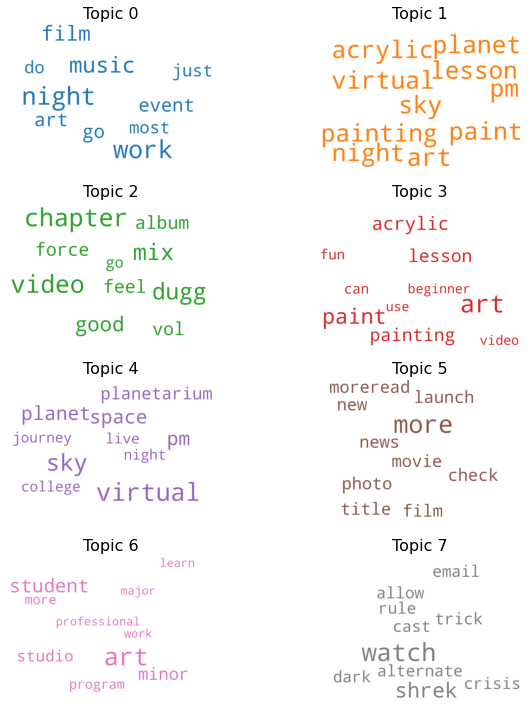

In [118]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [119]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_lemmatized):
  # Init output
  sent_topics_df = pd.DataFrame()

  # Get main topic in each document
  for i, row_list in enumerate(ldamodel[corpus]):
      row = row_list[0] if ldamodel.per_word_topics else row_list            
      # print(row)
      row = sorted(row, key=lambda x: (x[1]), reverse=True)
      # Get the Dominant topic, Perc Contribution and Keywords for each document
      for j, (topic_num, prop_topic) in enumerate(row):
          if j == 0:  # => dominant topic
              wp = ldamodel.show_topic(topic_num)
              topic_keywords = ", ".join([word for word, prop in wp])
              sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
          else:
              break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9991,"art, paint, acrylic, lesson, painting, fun, can, video, use, beginner","[easy, paint, adorable, witch, sister, wood, lovefallart, paint, art, sherpacanvas, paint, begin..."
1,1,0.0,0.9953,"work, night, music, film, art, go, event, just, most, do","[unedited, photo, show, just, how, crazy, past, really, history, just, most, hard, work, actress..."
2,2,7.0,0.9349,"watch, shrek, trick, email, dark, rule, allow, alternate, cast, crisis","[watch, watch, navigationsign, breaking, news, email]"
3,3,6.0,0.9978,"art, student, minor, studio, more, program, major, work, learn, professional","[art, fine, art, minor, complete, program, study, compliment, major, interest, learn, more, fine..."
4,4,7.0,0.9784,"watch, shrek, trick, email, dark, rule, allow, alternate, cast, crisis","[watch, shrek, forever, stream, rumpelstiltskin, trick, midlife, crisis, burden, shrek, allow, e..."
5,5,3.0,0.9369,"art, paint, acrylic, lesson, painting, fun, can, video, use, beginner","[play, como, como, como, tv, carplay]"
6,6,2.0,0.9621,"chapter, video, dugg, mix, good, feel, force, vol, album, go","[force, feel, chapter, force, feel, chapter, online, force, feel, chapter]"
7,7,5.0,0.9753,"more, film, new, movie, photo, check, title, news, launch, moreread","[movie, new, film, title, launch, formal, pooja, check, photo, news, moreread, more, newsread, m..."
8,8,2.0,0.9973,"chapter, video, dugg, mix, good, feel, force, vol, album, go","[dugg, dugg, brand, new, single, dugg, download, listen, dugg, flexyjam, torrent, dugg, little, ..."
9,9,0.0,0.9988,"work, night, music, film, art, go, event, just, most, do","[visit, work, week, do, time, start, unwind, even, re, vacation, work, brain, joyous, surround, ..."


In [120]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9988,"work, night, music, film, art, go, event, just, most, do","[visit, work, week, do, time, start, unwind, even, re, vacation, work, brain, joyous, surround, ..."
1,2.0,0.9973,"chapter, video, dugg, mix, good, feel, force, vol, album, go","[dugg, dugg, brand, new, single, dugg, download, listen, dugg, flexyjam, torrent, dugg, little, ..."
2,3.0,0.9991,"art, paint, acrylic, lesson, painting, fun, can, video, use, beginner","[easy, paint, adorable, witch, sister, wood, lovefallart, paint, art, sherpacanvas, paint, begin..."
3,4.0,0.9942,"virtual, sky, pm, space, planet, planetarium, night, live, college, journey","[planet, park, day, virtual, event, virtual, planetarium, join, pm, virtual, tour, night, sky, p..."
4,5.0,0.9753,"more, film, new, movie, photo, check, title, news, launch, moreread","[movie, new, film, title, launch, formal, pooja, check, photo, news, moreread, more, newsread, m..."
5,6.0,0.9978,"art, student, minor, studio, more, program, major, work, learn, professional","[art, fine, art, minor, complete, program, study, compliment, major, interest, learn, more, fine..."
6,7.0,0.9784,"watch, shrek, trick, email, dark, rule, allow, alternate, cast, crisis","[watch, shrek, forever, stream, rumpelstiltskin, trick, midlife, crisis, burden, shrek, allow, e..."
7,8.0,0.9035,"view, pic, total, pussy, art, paint, night, free, painting, can","[pussy, view, total, pic]"


In [121]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

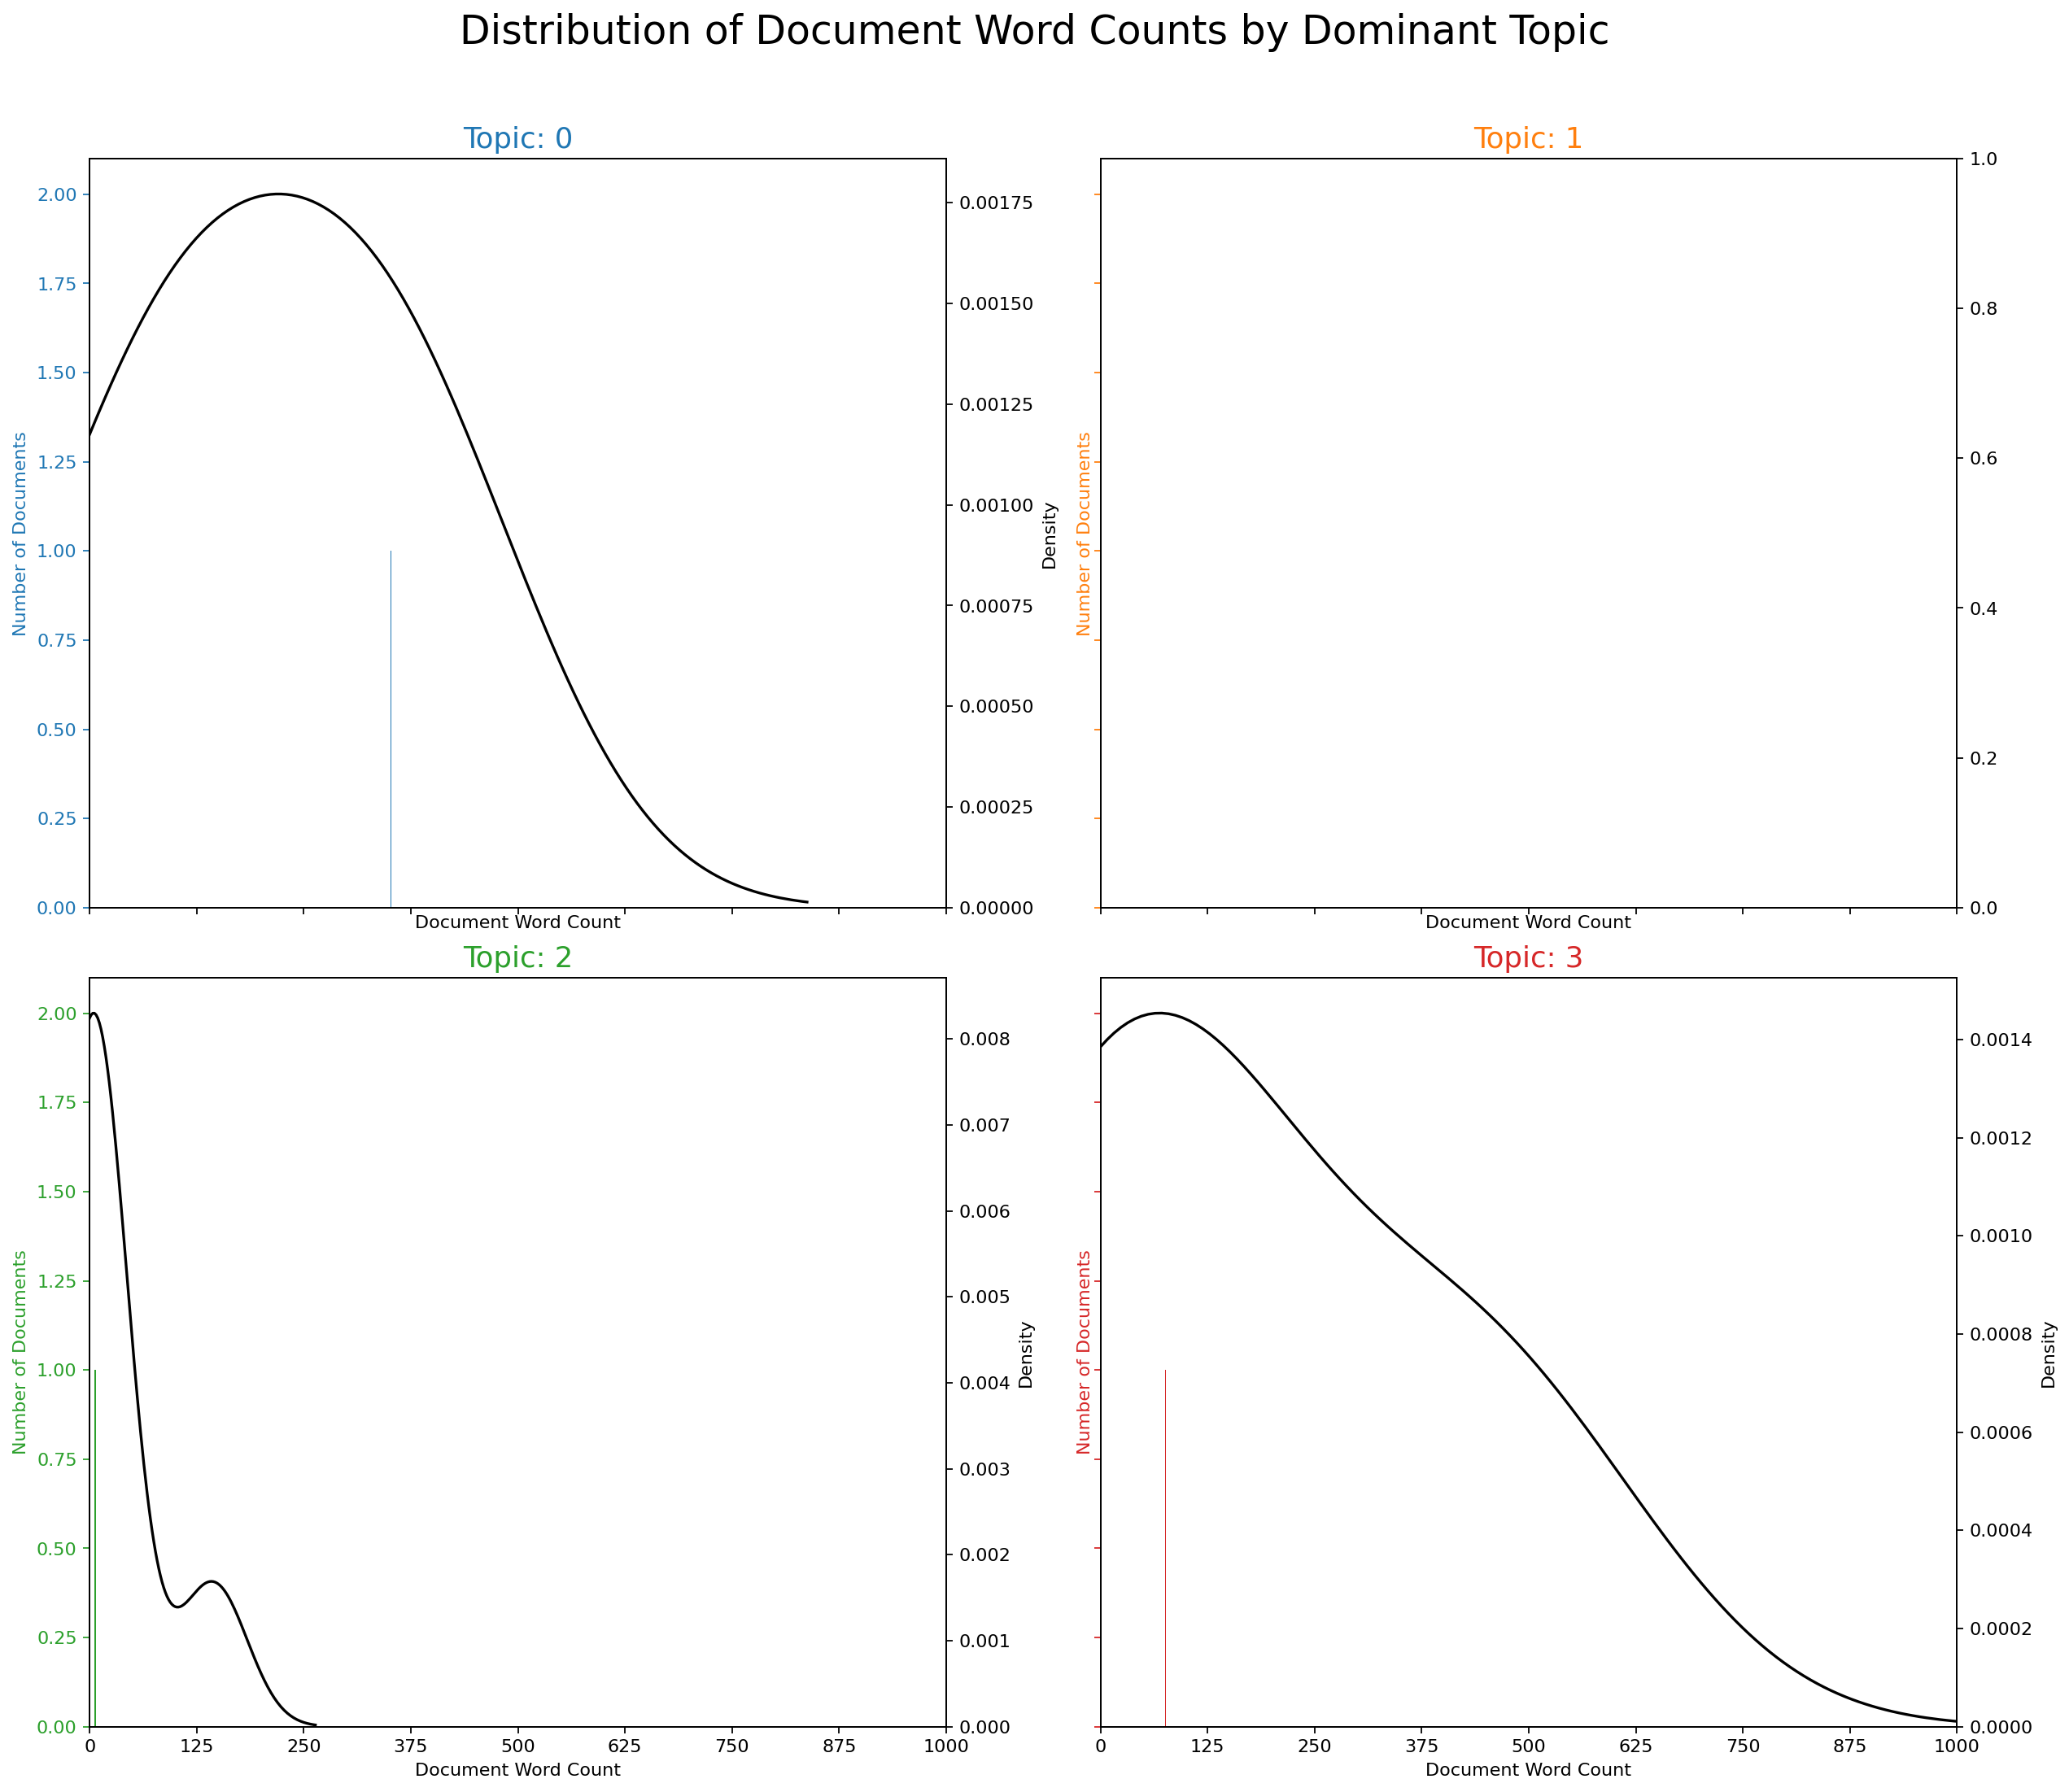

In [122]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

**Topic Distribution**

In [138]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
topic_distribution= []
for i in range(18):
  tokens = [stemmer.stem(token) for token in nltk.word_tokenize(docs[i].lower()) if token not in stop_words]
  print(lda_model[id2word.doc2bow(tokens)][0])
  topic_distribution.append(lda_model[id2word.doc2bow(tokens)][0])

[(0, 0.0282188), (3, 0.9604156)]
[(0, 0.9934689)]
[(2, 0.014446455), (3, 0.19403292), (7, 0.7413)]
[(3, 0.020854842), (6, 0.96726775)]
[(0, 0.083651334), (7, 0.88695264)]
[(2, 0.010581474), (3, 0.9453617)]
[(2, 0.9387529), (3, 0.010386819)]
[(5, 0.9653535)]
[(2, 0.96788764), (3, 0.012358036), (6, 0.018129373)]
[(0, 0.9945885)]
[(0, 0.015715731), (2, 0.022759052), (3, 0.019351983), (4, 0.01320553), (5, 0.012510571), (6, 0.8781878), (7, 0.01564069), (8, 0.012640656)]
[(0, 0.015715731), (2, 0.8858887), (3, 0.019351983), (4, 0.01320553), (5, 0.012510571), (6, 0.015058124), (7, 0.01564069), (8, 0.012640656)]
[(0, 0.03740076), (3, 0.9390688), (5, 0.018130656)]
[(0, 0.012204403), (2, 0.68795913), (3, 0.015028222), (4, 0.010255051), (6, 0.0116937235), (7, 0.23557125)]
[(4, 0.99252164)]
[(2, 0.014446341), (3, 0.20613381), (8, 0.7272949)]
[(2, 0.9387529), (3, 0.010386815)]
[(0, 0.11482204), (1, 0.072974145), (2, 0.16628183), (3, 0.14138918), (4, 0.096482046), (5, 0.09140454), (6, 0.11001744), (7

In [140]:
df['Topic Distribution'] = topic_distribution
df

,Web page file,Tokenized Text,Topic Distribution
0,ver1_scrapedweb-107.json,"[easy, halloween, painting, adorable, witch, sisters, in, the, woods, lovefallart, painting, the...","[(0, 0.028218603), (3, 0.9604158)]"
1,ver1_scrapedweb-1023.json,"[unedited, photos, that, show, just, how, crazy, the, past, really, was, history, dailysusan, sa...","[(0, 0.9934689)]"
2,ver1_scrapedweb-1024.json,"[watch, abc, watch, abc, onlinemain, navigationsign, up, for, our, breaking, news, email, alerts...","[(2, 0.014446455), (3, 0.19403292), (7, 0.7413)]"
3,ver1_scrapedweb-1025.json,"[art, thiel, collegethiel, college, fine, art, minors, complete, program, of, study, that, compl...","[(3, 0.02085397), (6, 0.9672689)]"
4,ver1_scrapedweb-1026.json,"[watch, shrek, forever, after, streaming, rumpelstiltskin, tricks, midlife, crisis, burdened, sh...","[(0, 0.08365126), (7, 0.8869527)]"
5,ver1_scrapedweb-1027.json,"[manual, de, cancoes, de, abr, rtp, play, rtpmurais, nome, do, album, de, estreia, da, nova, ide...","[(2, 0.010581474), (3, 0.9453617)]"
6,ver1_scrapedweb-1030.json,"[force, of, feeling, chapter, manhuascanread, force, of, feeling, chapter, online, force, of, fe...","[(2, 0.9387529), (3, 0.010386818)]"
7,ver1_scrapedweb-1031.json,"[idhi, nadhi, movie, pooja, ceremony, image, new, film, titled, idhi, nadhi, has, been, launched...","[(5, 0.9653535)]"
8,ver1_scrapedweb-1032.json,"[download, dej, loaf, tap, in, feat, dugg, sada, baby, hiphopde, download, song, tap, in, feat, ...","[(2, 0.96788734), (3, 0.012358038), (6, 0.01812962)]"
9,ver1_scrapedweb-1033.json,"[friday, funday, visit, sarasotait, friday, the, work, week, is, done, and, its, time, to, start...","[(0, 0.9945885)]"
